In [145]:
#importing modules
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [146]:
#inspecting dataset
df = pd.read_csv('all_data.csv')
print(df.head(10))
print(df.info())
print(df.Country.unique())

print(df.GDP.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
5   Chile  2005                              78.4  1.229650e+11
6   Chile  2006                              78.9  1.547880e+11
7   Chile  2007                              78.9  1.736060e+11
8   Chile  2008                              79.6  1.796380e+11
9   Chile  2009                              79.3  1.723890e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   

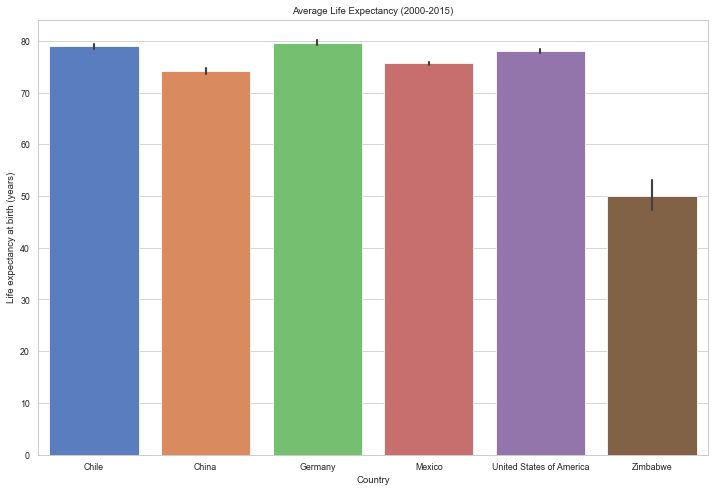

                    Country  Life expectancy at birth (years)
0                     Chile                          78.94375
1                     China                          74.26250
2                   Germany                          79.65625
3                    Mexico                          75.71875
4  United States of America                          78.06250
5                  Zimbabwe                          50.09375


In [147]:
#Average life expectancy per country
sns.set_context('paper')
sns.set_style('whitegrid')
sns.set_palette('muted')

f = plt.figure(figsize=(12,8))
sns.barplot(x='Country', y='Life expectancy at birth (years)', data=df)
plt.title('Average Life Expectancy (2000-2015)')
plt.show()

avg_life_expectancy = df.groupby('Country')['Life expectancy at birth (years)'].mean().reset_index()
print(avg_life_expectancy)

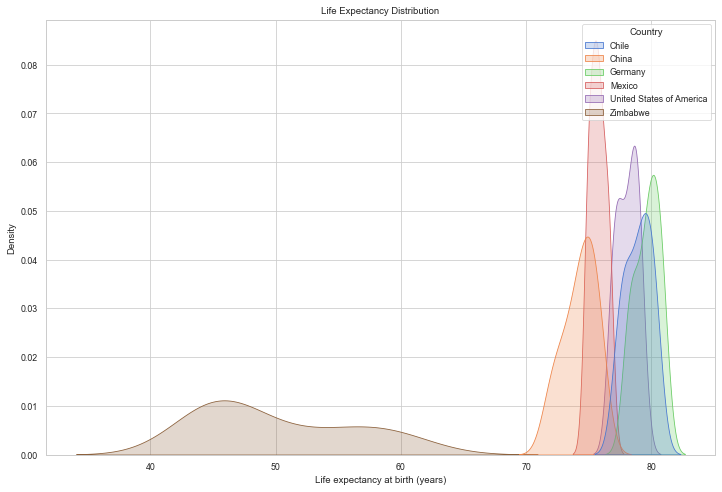

In [148]:
#testing statistical differences in Average Life Expectancy
f = plt.figure(figsize=(12,8))
sns.kdeplot(df['Life expectancy at birth (years)'], hue=df.Country, shade=True)
plt.title('Life Expectancy Distribution')
plt.show()

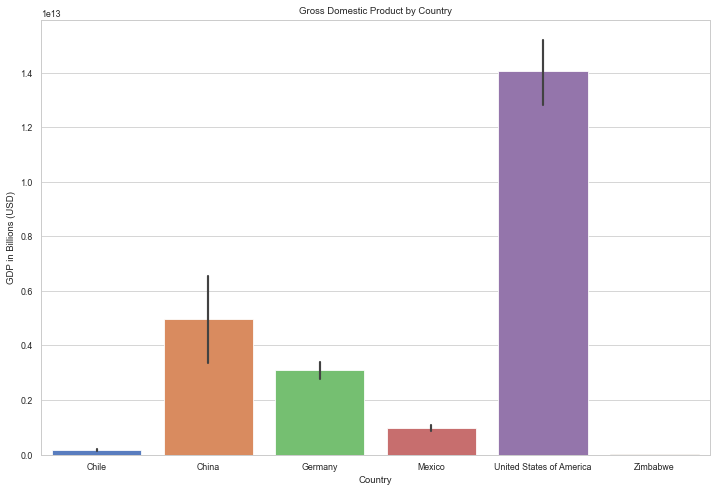

                    Country           GDP
0                     Chile  1.697888e+11
1                     China  4.957714e+12
2                   Germany  3.094776e+12
3                    Mexico  9.766506e+11
4  United States of America  1.407500e+13
5                  Zimbabwe  9.062580e+09


In [149]:
#Average GDP per country
f = plt.figure(figsize=(12,8))
sns.barplot(x='Country', y='GDP', data=df)
plt.title('Gross Domestic Product by Country')
plt.ylabel('GDP in Billions (USD)')
plt.show()

print(df.groupby('Country').GDP.mean().reset_index())

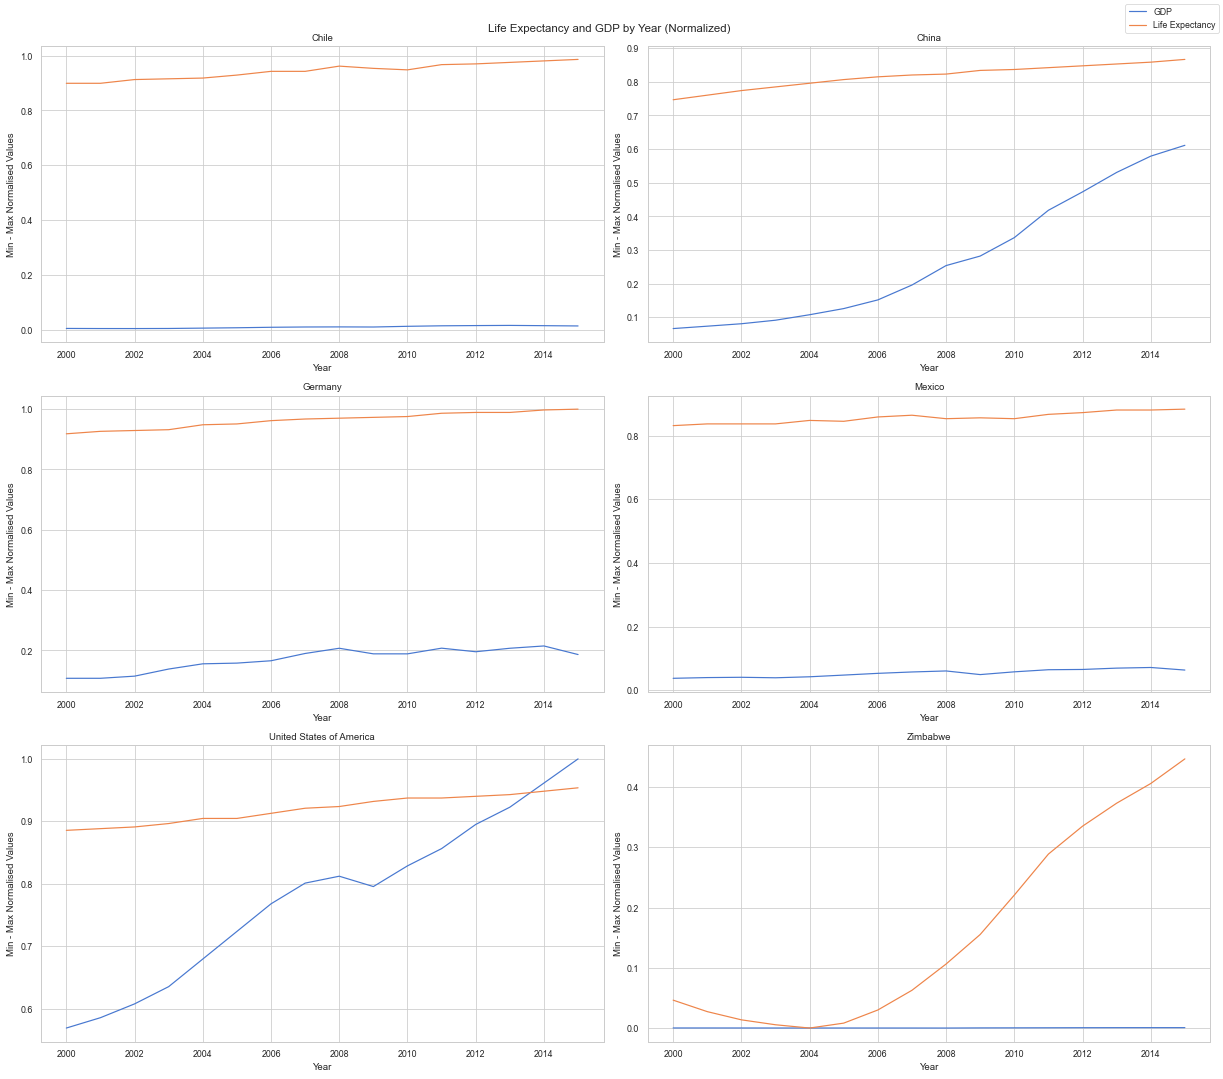

In [141]:
#GDP and Life expectancy over time trends
#Normalizing GDP and Life Expectancy
from sklearn.preprocessing import MinMaxScaler

cols_to_norm = ['GDP', 'Life expectancy at birth (years)']
df[cols_to_norm] = MinMaxScaler().fit_transform(df[cols_to_norm])
#print(df.head())

f, ax = plt.subplots(3,2, figsize=(17,15))
f.suptitle('Life Expectancy and GDP by Year (Normalized)')


sns.lineplot(ax=ax[0,0], x=df.Year, y=df.GDP[df.Country == 'Chile'])
sns.lineplot(ax=ax[0,0], x=df.Year, y=df['Life expectancy at birth (years)'][df.Country == 'Chile'])
a1 = f.axes[0]
a1.set_title('Chile')
a1.set(ylabel='Min - Max Normalised Values')

sns.lineplot(ax=ax[0,1], x=df.Year, y=df.GDP[df.Country == 'China'])
sns.lineplot(ax=ax[0,1], x=df.Year, y=df['Life expectancy at birth (years)'][df.Country == 'China'])
a2 = f.axes[1]
a2.set_title('China')
a2.set(ylabel='Min - Max Normalised Values')

sns.lineplot(ax=ax[1,0], x=df.Year, y=df.GDP[df.Country == 'Germany'])
sns.lineplot(ax=ax[1,0], x=df.Year, y=df['Life expectancy at birth (years)'][df.Country == 'Germany'])
a3 = f.axes[2]
a3.set_title('Germany')
a3.set(ylabel='Min - Max Normalised Values')

sns.lineplot(ax=ax[1,1], x=df.Year, y=df.GDP[df.Country == 'Mexico'])
sns.lineplot(ax=ax[1,1], x=df.Year, y=df['Life expectancy at birth (years)'][df.Country == 'Mexico'])
a4 = f.axes[3]
a4.set_title('Mexico')
a4.set(ylabel='Min - Max Normalised Values')

sns.lineplot(ax=ax[2,0], x=df.Year, y=df.GDP[df.Country == 'United States of America'])
sns.lineplot(ax=ax[2,0], x=df.Year, y=df['Life expectancy at birth (years)'][df.Country == 'United States of America'])
a5 = f.axes[4]
a5.set_title('United States of America')
a5.set(ylabel='Min - Max Normalised Values')

sns.lineplot(ax=ax[2,1], x=df.Year, y=df.GDP[df.Country == 'Zimbabwe'])
sns.lineplot(ax=ax[2,1], x=df.Year, y=df['Life expectancy at birth (years)'][df.Country == 'Zimbabwe'])
a6 = f.axes[5]
a6.set_title('Zimbabwe')
a6.set(ylabel='Min - Max Normalised Values')

f.legend(['GDP', 'Life Expectancy'])
f.tight_layout()
plt.show()

<Figure size 864x576 with 0 Axes>

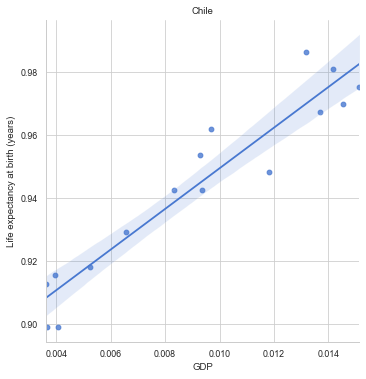

<Figure size 864x576 with 0 Axes>

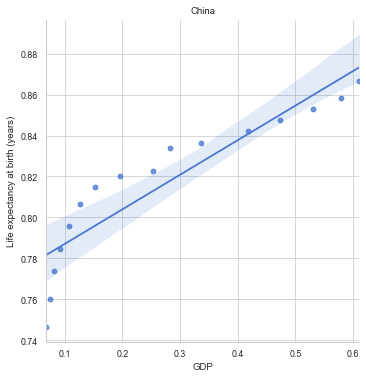

<Figure size 864x576 with 0 Axes>

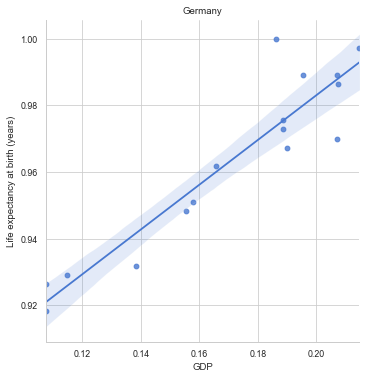

<Figure size 864x576 with 0 Axes>

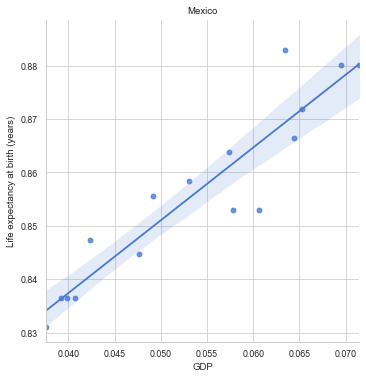

<Figure size 864x576 with 0 Axes>

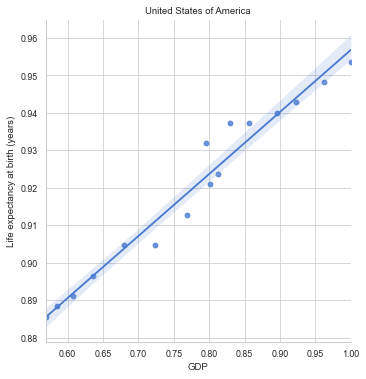

<Figure size 864x576 with 0 Axes>

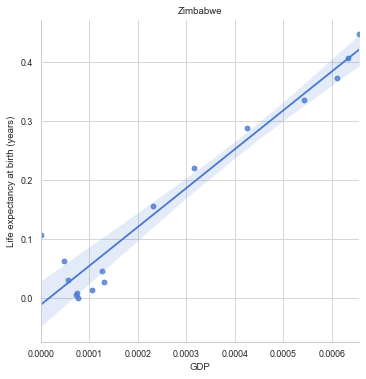

In [142]:
#Correlation between life expectancy and GDP
df1 = df[['Country', 'GDP', 'Life expectancy at birth (years)']]
for i in df1.Country.unique():
    plt.figure(i, figsize=(12,8))
    sns.lmplot(x='GDP', y='Life expectancy at birth (years)', data=df1[df1.Country == i])
    plt.title(i)

In [143]:
#Linear Regression Correlation Score by Country
from scipy.stats import pearsonr

corr=[]
pval=[]

for i in df.Country.unique():
    correlation, pvalue = pearsonr(df.GDP[df.Country == i], df['Life expectancy at birth (years)'][df.Country == i],)
    corr.append(correlation)
    pval.append(pvalue)

print(corr)
print(pval)

[0.9498766659254418, 0.908525540864836, 0.9326988982561274, 0.9322377167847092, 0.9817092382430258, 0.9661998955858777]
[1.8659139746584746e-08, 1.125098572070055e-06, 1.401881553404513e-07, 1.4686960248303505e-07, 1.749970926909872e-11, 1.2358516366846197e-09]


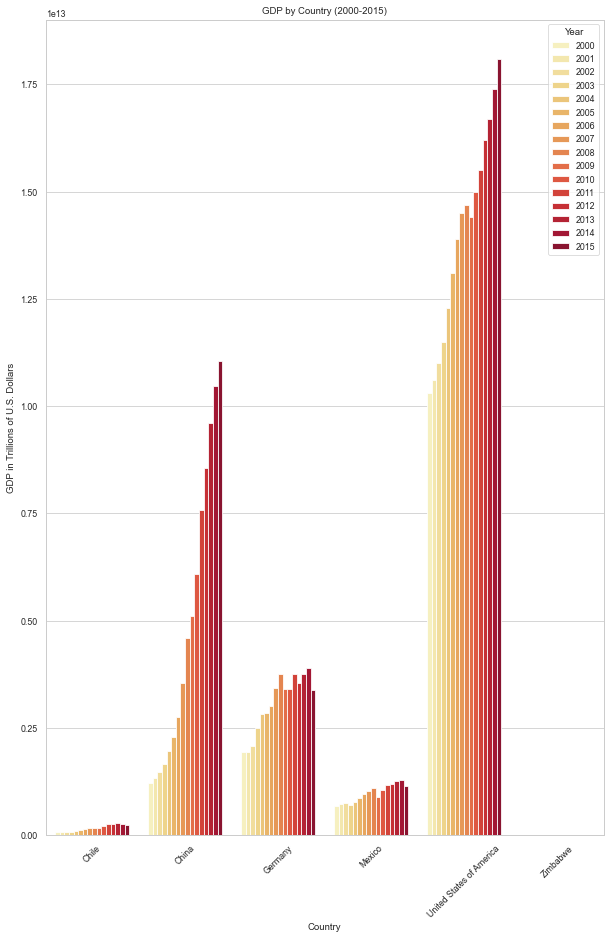

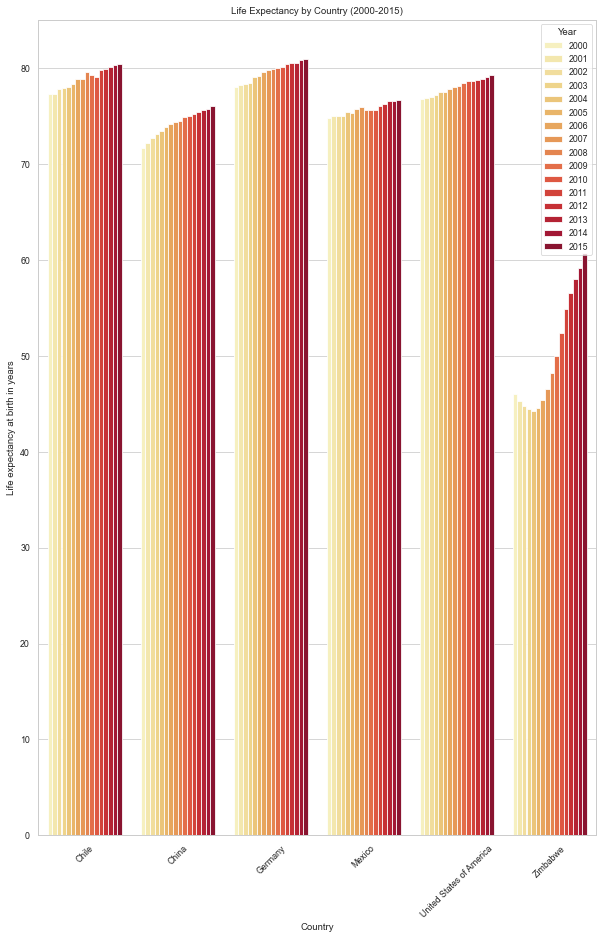

In [162]:
#Bar Plots Of GDP and Life Expectancy over time
f, ax = plt.subplots(figsize=(10, 15)) 
ax = sns.barplot(x="Country", y="GDP", hue="Year", data=df, palette='YlOrRd')
plt.xticks(rotation=45)
ylabel="GDP in Trillions of U.S. Dollars"
plt.title('GDP by Country (2000-2015)')
plt.ylabel(ylabel)
plt.show()

f, ax = plt.subplots(figsize=(10, 15)) 
ax = sns.barplot(x="Country", y="Life expectancy at birth (years)", hue="Year", data=df, palette='YlOrRd')
plt.xticks(rotation=45)
plt.ylabel(ylabel)
ax.set(ylabel="Life expectancy at birth in years")
plt.title('Life Expectancy by Country (2000-2015)')
plt.show()